# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('product_sales.csv')
df.head(5)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


| Column Name         | Details                                                                                        |
|---------------------|------------------------------------------------------------------------------------------------|
| week                | Week sale was made, counted as weeks since product launch                                      |
| sales_method        | Character, which of the three sales methods were used for that customer                        |
| customer_id         | Character, unique identifier for the customer                                                  |
| nb_sold             | Numeric, number of new products sold                                                            |
| revenue             | Numeric, revenue from the sales, rounded to 2 decimal places.                                   |
| years_as_customer   | Numeric, number of years customer has been buying from us (company founded in 1984)             |
| nb_site_visits      | Numeric, number of times the customer has visited our website in the last 6 months              |
| state               | Character, location of the customer i.e. where orders are shipped                              |


In [80]:
variables = pd.DataFrame(columns=['Variable', 'Number of unique values', 'Values', 'Number of NaN'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist(), df[var].isna().sum()]

variables

,Variable,Number of unique values,Values,Number of NaN
0,week,6,"[2, 6, 5, 4, 3, 1]",0
1,sales_method,5,"[Email, Email + Call, Call, em + call, email]",0
2,customer_id,15000,"[2e72d641-95ac-497b-bbf8-4861764a7097, 3998a98...",0
3,nb_sold,10,"[10, 15, 11, 9, 13, 8, 12, 7, 14, 16]",0
4,revenue,6743,"[nan, 225.47, 52.55, 90.49, 65.01, 113.38, 99....",1074
5,years_as_customer,42,"[0, 1, 6, 3, 10, 9, 7, 4, 2, 20, 8, 5, 17, 36,...",0
6,nb_site_visits,27,"[24, 28, 26, 25, 22, 31, 23, 30, 21, 27, 32, 2...",0
7,state,50,"[Arizona, Kansas, Wisconsin, Indiana, Illinois...",0


# Data validation:   
  ## Describe validation and cleaning steps for every column in the data 
  Below is a table with a general description of each column and changes made. Code for changes are presented after the table.

| Column Name         | Details                                                                                        |
|---------------------|------------------------------------------------------------------------------------------------|
| week                | No missing values, all integers. No cleaning needed                                      |
| sales_method        | No missing values, however more than 3 different categories. **Replacementes made as below**        |
| customer_id         | No missing values, no duplicates, same as description. No cleaning needed                      |
| nb_sold             | No missing values, same as description. No cleaning needed                       |
| revenue             | Numeric with 1074 missing values. **Replaced them with average of sales method and nb_sold, as below**.         |
| years_as_customer   | Numeric, no missing values. Some customers had a higher value than 39 (Age of company). **Changed to max**. |
| nb_site_visits      | Numeric, no missing values, same as description. No cleaning needed               |
| state               | Character, no missing values, same as description. No cleaning needed. |


#### Column sales method: adjusting all values to same standard

In [81]:
df['sales_method'].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

In [82]:
df['sales_method'].unique()
df['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'}, inplace=True)
df['sales_method'].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

#### Column **revenue**: filling missing values with average of sales method and nb_sold

In [83]:
df['revenue'].isna().sum()

1074

In [84]:
grouped = df.groupby(['sales_method', 'nb_sold'])['revenue'].transform('mean')
df['revenue'].fillna(grouped, inplace=True)
df['revenue'].isna().sum()

0

#### Column years as customer: two customers had a higher value in the column that the max possible (years since 1984). Replace with max value possible.

In [85]:
df.loc[df['years_as_customer'] > 2023 - 1984]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [86]:
df.loc[df['years_as_customer'] > 2023 - 1984, 'years_as_customer'] = 2023 - 1984
df.loc[df['years_as_customer'] > 2023 - 1984]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


## How many customers were there for each approach?

We can observe that the **Email** sales method attracted the most customers, accounting for 7,466 of the total, which is half of all customers. This is a remarkable achievement since, as per our instructions, it requires minimal effort.

The **Calling** method accounted for 4,962 customers, approximately a third of all clients. Lastly, the **Email + Call** approach had the lowest number of customers, with only 2,572. While this might appear to be the least favorable approach, we will soon demonstrate that it holds significant potential.

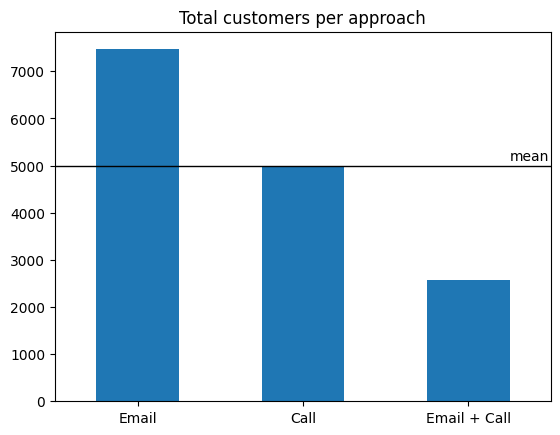

In [87]:
df.groupby('sales_method').count()['customer_id'].sort_values(ascending=False).plot(kind='bar')
plt.title("Total customers per approach")
plt.axhline(df['sales_method'].value_counts().mean(), color='black', linewidth=1)
plt.text(plt.xlim()[1]*0.9, df['sales_method'].value_counts().mean() * 1.02, 'mean', color='black')
plt.xlabel("")
plt.xticks(rotation=0)
plt.show()

## What does the spread of the revenue look like overall? And for each method?

Our boxplot below shows us how the overall mean of revenue is close to the third quartile. The high maximum value of 238.32 indicates that there may be some extreme values or outliers in the data, and we see those values above the top whisker. These could be considered as outliers, but we are going to see soon what these values mean. 
The distance between the bottom and top whiskers indicates that our data has a wide spread.

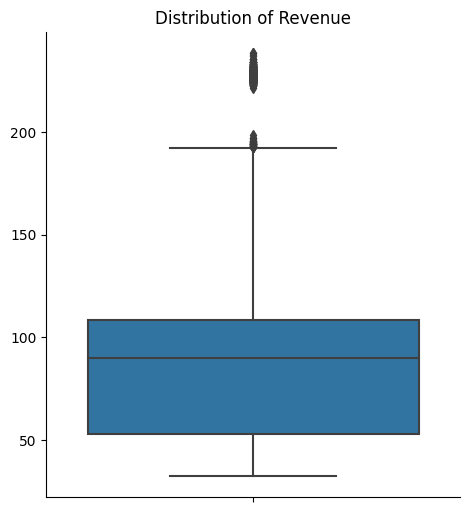

In [88]:
sns.catplot(y='revenue',
            data=df,
            kind='box',
            height=5)
plt.title("Distribution of Revenue")
plt.xlabel("")
plt.ylabel("")
plt.show()

The revenue data seems to be positively skewed, as the mean is higher than the median. We also see that the bars seem to be in three groups: one to the left, one in the middle and one with three little peaks to the right. At first we may think outliers, but when we segregate our data by sales method, we understand things better.


In [89]:
round(df['revenue'].describe(), 2)

count    15000.00
mean        95.72
std         48.38
min         32.54
25%         52.76
50%         90.00
75%        108.63
max        238.32
Name: revenue, dtype: float64

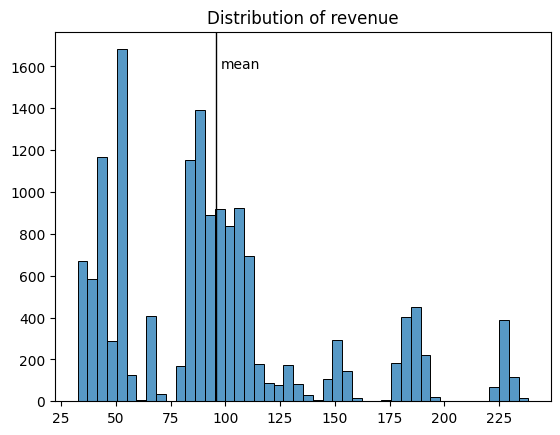

In [90]:
sns.histplot(data=df, x="revenue")
plt.axvline(df['revenue'].mean(), color='black', linewidth=1)
plt.text(df['revenue'].mean() + 2, plt.ylim()[1]*0.9, 'mean', color='black')
plt.xticks(range(25, 226, 25))
plt.xlabel("")
plt.ylabel("")
plt.title("Distribution of revenue")
plt.show()

By segregating our revenue data by sales method, we gain a clearer understanding of the revenue distribution and spread.

While **Calling** accounted for about 33% of sales, it has lowest average revenue and its highest grossing sale is lower than the lowest sale of the other 2 methods. These results suggest that investing resources in this method may not be worthwhile.

On the other hand, **Email** has the highest number of sales, highest revenue generated and the highest number of products sold (all of which will be shown shortly). These findings clearly demonstrate that **Email** is the most advantageous method, as it requires the least amount of effort and resources while producing the best results.

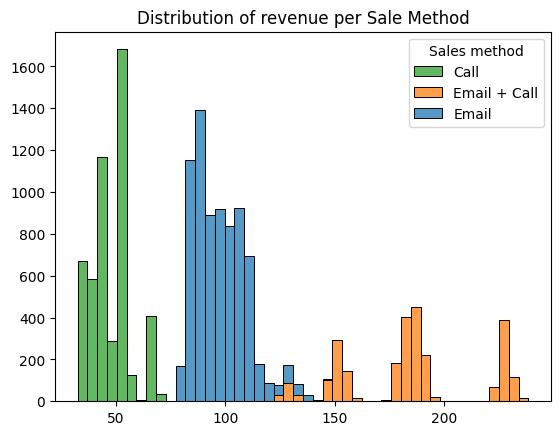

In [91]:
sns.histplot(data=df, x="revenue", hue="sales_method", multiple="stack")
plt.legend(title="Sales method", labels=["Call", "Email + Call", "Email"])
plt.xlabel("")
plt.ylabel("")
plt.title("Distribution of revenue per Sale Method")
plt.show()

In [92]:
round(df.groupby('sales_method')['revenue'].agg(['sum','mean', 'min', 'max']), 2)

,sum,mean,min,max
sales_method,,,,
Call,236397.63,47.64,32.54,71.36
Email,725583.56,97.19,78.83,148.97
Email + Call,473828.41,184.23,122.11,238.32


But **Email** it is not the only method that should be looked at: **Email + Call** also has a lot of potential, as it has shown to generate higher revenue sales in general.

In fact, when we look at the average revenue per sale, **Email + Call** had a value that was twice as high as **Email**. Despite having the least total sales out of all three methods, only 17%, it generated the second highest total revenue. Therefore, it is clear that this method should not be overlooked and should still be utilized.

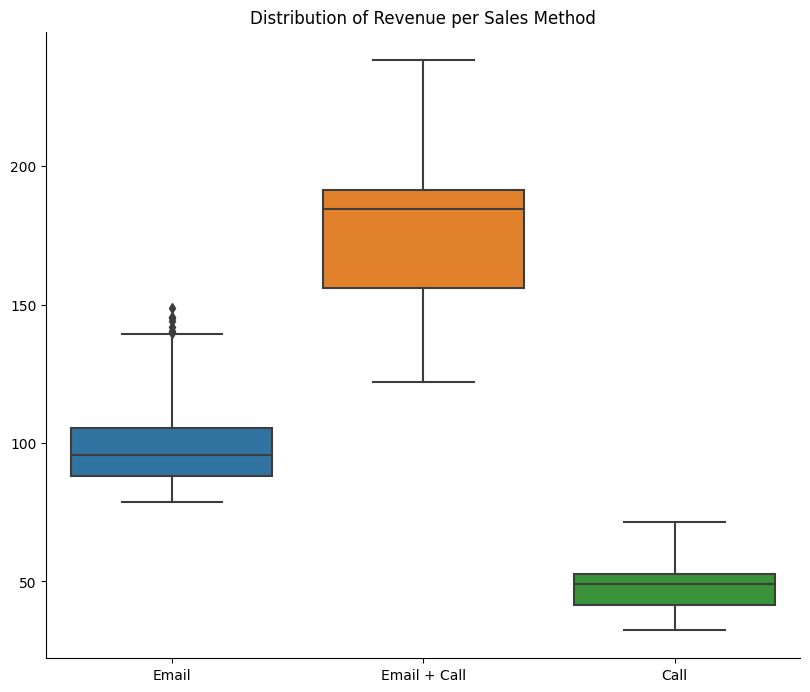

In [93]:
sns.catplot(y='revenue',
            x='sales_method',
            data=df,
            kind='box',
            whis=2.0,
            height=7,
            aspect=1.2) 
plt.title("Distribution of Revenue per Sales Method")
plt.xlabel("")
plt.ylabel("")
plt.show()

## Was there any difference in revenue over time for each of the methods?

Yes, there was. As we can see below, **Email** kicked off very strong, with 250 and 150 thousand in revenue in the first two weeks, respectively, but it dropped off pretty much week after week, with the exception of week 4. However, even with the significant decrease, it still remained the most effective method for the first 4 weeks. 

On the other hand, both the **Call** and **Email + Call** methods took a few weeks to gain momentum. The **Call** method hovered around the 50K mark the entire period.

**Email + Call** had a very nice increase in sales around the 4 week mark, even surpassing **Email** on the following weeks as the method with the highest revenue and achieving around 150 thousand in revenue for two consecutive weeks.

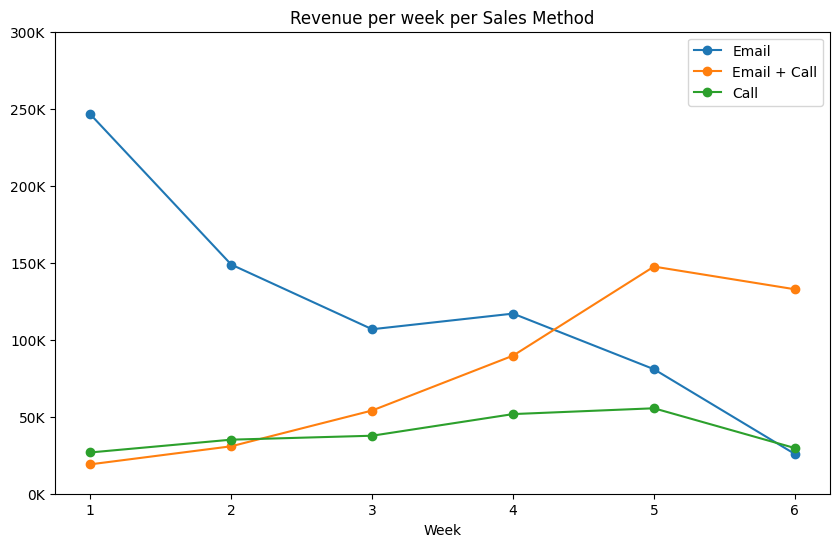

In [94]:
revenue_by_week = df.groupby(['sales_method', 'week'])['revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
for method in df['sales_method'].unique():
    df_method = revenue_by_week[revenue_by_week['sales_method'] == method]
    plt.plot(df_method['week'], df_method['revenue'], label=method, marker='o')

plt.title("Revenue per week per Sales Method")
plt.xlabel('Week')
# plt.ylabel('Revenue')
ticks = plt.yticks()[0]
labels = [f'{i:.0f}K' for i in ticks/1000]
plt.yticks(ticks=ticks, labels=labels)
plt.legend()
plt.show()

## Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.


Clearly, **Email** is our winner. As we can see below in our **overview graph**, this method generated the most sales, the most revenue and the most products sold. It takes very little work from the sales team and has produced the best results for the company.

**Email + Call** should not be discarded. Although it takes more time than **Email**, this sales method has produced good results, with the highest average sale and second most revenue. To put into perspective: the lowest sale generated by **Email + Call** is higher than **97%** of all **Email** sales.

Therefore, **Email + Call** should not be disregarded as it can provide additional value to the company.

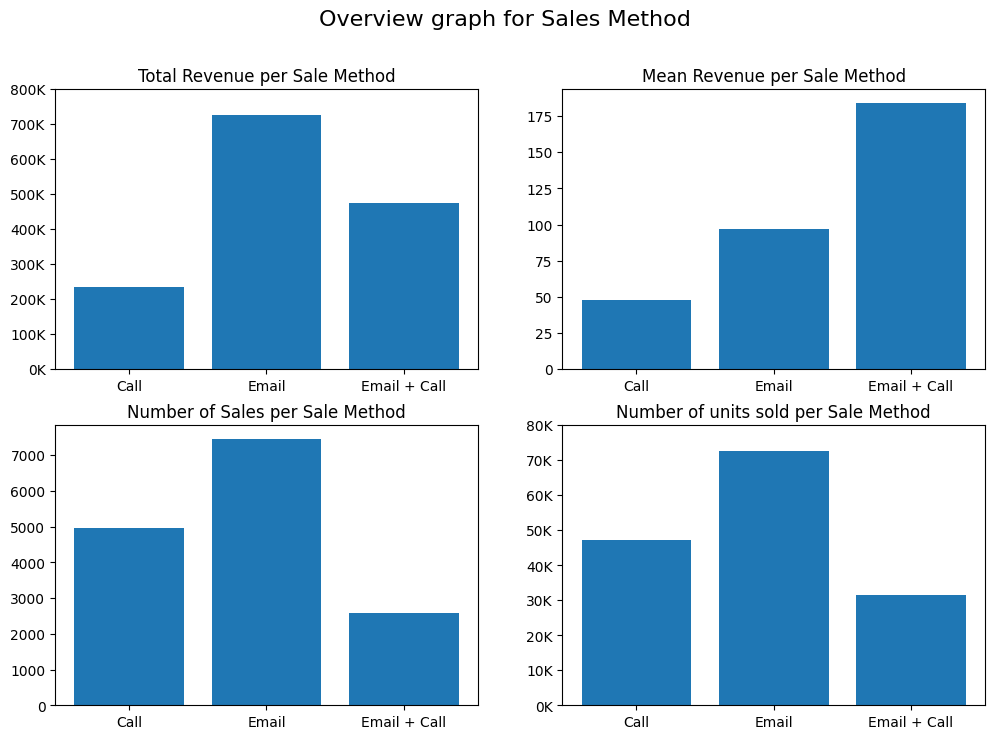

In [95]:
grouped = df.groupby('sales_method')
revenue_sum = grouped['revenue'].sum()
revenue_mean = grouped['revenue'].mean()
num_sales = grouped['revenue'].count()
products_sold = grouped['nb_sold'].sum()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle("Overview graph for Sales Method", fontsize=16)
axes[0][0].bar(revenue_sum.index, revenue_sum.values) 
axes[0][0].set_title('Total Revenue per Sale Method')
ticks = axes[0][0].get_yticks()
labels = [f'{i:.0f}K' for i in ticks/1000]
axes[0][0].set_yticks(ticks=ticks, labels=labels)

axes[0][1].bar(revenue_mean.index, revenue_mean.values)
axes[0][1].set_title('Mean Revenue per Sale Method')

axes[1][0].bar(num_sales.index, num_sales.values)
axes[1][0].set_title('Number of Sales per Sale Method')

axes[1][1].bar(products_sold.index, products_sold.values)
axes[1][1].set_title('Number of units sold per Sale Method')
ticks_2 = axes[1][1].get_yticks()
labels_2 = [f'{i:.0f}K' for i in ticks_2/1000]
axes[1][1].set_yticks(ticks=ticks_2, labels=labels_2)

plt.show()

## One interesting insight about our customers:

### Our oldest customers are not necessarily the ones who buy the most. The mean revenue per years as customer doesnt increase as we could expect. It even decreases slightly in the later values:

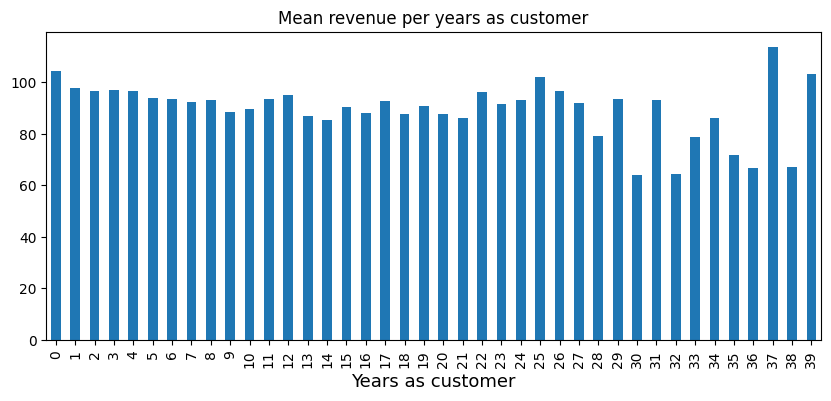

In [96]:
plt.figure(figsize=(10, 4))
df.groupby('years_as_customer')['revenue'].mean().plot(kind='bar')
# plt.tight_layout(True)
plt.title("Mean revenue per years as customer")
plt.xlabel("Years as customer", fontdict={'size': 13})
plt.show()

## Definition of a metric for the business to monitor  
### How should the business use the metric to monitor the business problem

Our objective with this study is to determine what is the best sales method the team should use. My suggestion is to monitor the average revenue per minute of effort for each method, or "**Efficiency Ratio**". 

The metric is calculated by dividing the **total revenue** generated by each sales method by the **total effort** expended, where effort is defined as the **average time spent on each sale**, multiplied by the **number of sales**.

Per the instructions, we assigned an average effort time for each sales method: 5 minutes for "**Email**", 15 minutes for "**Email + Call**" and 30 minutes for "**Call**". These numbers can be adjusted by the sales team to better represent the time spent for each method.

This metric can be used to track the performance of each sales method over time, and to identify areas where improvements in efficiency can be made. It can also be used to compare the performance of different sales methods against each other, and to identify which methods are most effective in generating revenue.

### Can you estimate initial value(s) for the metric based on the current data


With our initial data, our Efficiency Ratio for each sales method is as follows:

In [97]:
effort = {'Email': 5,
          'Call': 30,
          'Email + Call': 15}
df['effort'] = df['sales_method'].apply(lambda x: effort[x])
df_e = df.groupby("sales_method")[['revenue','effort']].sum().reset_index()
df_e['efficiency_ratio'] = round(df_e['revenue'] / df_e['effort'], 2)
df_e.rename(columns={"sales_method": "Sales Method", "efficiency_ratio": "Efficiency Ratio"}, inplace=True)
df_e[['Sales Method', 'Efficiency Ratio']].sort_values('Efficiency Ratio', ascending=False)

,Sales Method,Efficiency Ratio
1,Email,19.44
2,Email + Call,12.28
0,Call,1.59


These current numbers are good, but a decrease in efficiency for **Email** and **Email + Call** should indicate that actions need to be taken to improve these numbers.

## Final summary including recommendations that the business should undertake

With the data provided, we were able to identify that the **Email** sales method is the better alternative by most metrics. It has the highest number of: revenue generated, customers, units sold and efficiency ratio.

The **Call** method should really not be utilized as  much given its efficiency, and the other 2 alternatives should be preferred.

My suggestions following the analysis:
- Focus primarily on the **Email** method, as it has the highest **Efficiency Ratio** of all methods
- For well defined customers (using internal business metrics and market intelligence), utilize the **Email + Call** method, given its higher average revenue per sale.
- Track actual **effort** (or time spent) for each customer/sale through software or spreadsheets.. This will allow for a more accurate assessment of each method's efficiency and further improve our newly created business metric.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation